# Visualize the scraped housing data

In [61]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import importlib
import plotting_functions
import preprocess_functions as pp
importlib.reload(plotting_functions)
importlib.reload(pp)

<module 'preprocess_functions' from '/Users/simon/Desktop/personal/immo_datacollection/house_scraping_project/src/preprocess_functions.py'>

In [62]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [63]:
#pd.set_option(max_collumns, None)
import os
os.chdir('/Users/simon/Desktop/personal/immo_datacollection/house_scraping_project/')

In [64]:
df = pd.read_csv('outputs/property_data_raw.csv')
df = pp.preprocess(df)

Summary for number_of_bedrooms:
Coefficients: [0.00690335 0.82834781]
Intercept: 1.3030629649287921
Mean Squared Error: 0.9779005524861878
R-squared: 0.426527097123218

Summary for number_of_toilets:
Coefficients: [0.00359118 0.05247803 0.19806345]
Intercept: 0.4596828735240204
Mean Squared Error: 0.4164705882352941
R-squared: 0.27977136510732825

Summary for number_of_bathrooms:
Coefficients: [-1.34495123e-04 -2.76070166e-01  1.30195730e-01  5.35651131e-01]
Intercept: 0.26126816107213635
Mean Squared Error: 0.33266932270916333
R-squared: 0.40653117279362305

Summary for cadastral_income:
Coefficients: [ 1.85848094 58.72292776]
Intercept: 296.30536551691466
Mean Squared Error: 367364.82175226585
R-squared: -0.1675605102430846



In [65]:
pp.perform_regression_plot(df, 'price', 'cadastral_income')

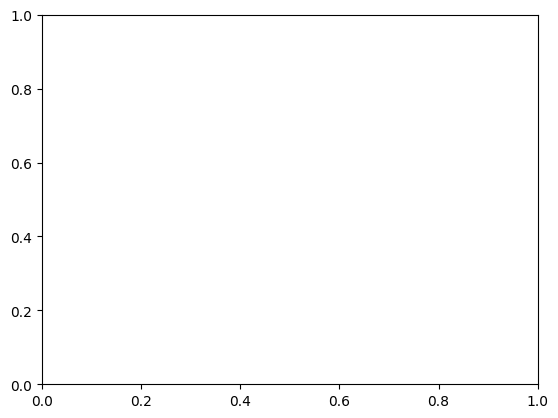

In [66]:
hist_fig = px.histogram(df, x='price', nbins=50, title='Distribution of Property Prices', color='property_type_HOUSE', barmode='stack')

# Initialize the KDE figure
kde_fig = go.Figure()

# Add a KDE line for each property type, and compute statistics
for property_type in df['property_type_HOUSE'].unique():
    subset = df[df['property_type_HOUSE'] == property_type]
    
    # Calculate the KDE using seaborn
    sns_kde = sns.kdeplot(subset['price'], bw_adjust=1, fill=False)
    kde_x, kde_y = sns_kde.get_lines()[0].get_data()
    sns_kde.clear()
    
    # Add the KDE line to the figure
    kde_fig.add_trace(go.Scatter(
        x=kde_x,
        y=kde_y,
        mode='lines',
        name=f'{property_type} KDE'
    ))
    
    # Calculate statistics
    mean = subset['price'].mean()
    median = subset['price'].median()
    stdev = subset['price'].std()
    
    # Add annotations for mean, median, and stdev
    kde_fig.add_trace(go.Scatter(
        x=[mean, mean],
        y=[0, max(kde_y)],
        mode='lines',
        line=dict(dash='dash'),
        name=f'{property_type} Mean'
    ))
    kde_fig.add_trace(go.Scatter(
        x=[median, median],
        y=[0, max(kde_y)],
        mode='lines',
        line=dict(dash='dot'),
        name=f'{property_type} Median'
    ))
    kde_fig.add_trace(go.Scatter(
        x=[mean - stdev, mean + stdev],
        y=[0, 0],
        mode='lines',
        line=dict(dash='dash'),
        name=f'{property_type} Std Dev'
    ))

# Update layout for the KDE figure
kde_fig.update_layout(
    title='Kernel Density Estimate of Property Prices with Statistics',
    xaxis_title='Price',
    yaxis_title='Density'
)

# Show the plots
hist_fig.show()
kde_fig.show()

In [67]:
df.columns

Index(['property_id', 'date_obtained', 'price', 'livable_area', 'heating_type',
       'has_photovoltaic_panels', 'has_double_glazing', 'number_of_bathrooms',
       'number_of_bedrooms', 'number_of_toilets', 'has_living_room',
       'has_attic', 'has_basement', 'has_terrace', 'terrace_surface',
       'has_garden', 'garden_surface', 'energy_label',
       'primary_energy_consumption', 'postal_code', 'latitude', 'longitude',
       'year_built', 'building_condition', 'property_size', 'flood_zone_type',
       'cadastral_income', 'age', 'price_sq', 'property_type_HOUSE'],
      dtype='object')

In [68]:
df = df.query('price_sq < 30')

energy_label_order = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F']

# Create the box plot
fig = px.box(df, x='energy_label', y='price_sq', color='property_type_HOUSE', title='Box Plot of House Prices by Energy Label and Property Type',
             category_orders={'energy_label': energy_label_order})

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Energy Label',
    yaxis_title='Price',
    boxmode='group'  # Group by property type
)

# Show the plot
fig.show()

In [69]:
import importlib
importlib.reload(plotting_functions)
import plotting_functions

plotting_functions.generate_boxplot(df, x = 'heating_type', y = 'price', color = 'property_type_HOUSE')

In [70]:


energy_label_order = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F']

# Create the box plot
fig = px.box(df, x='heating_type', y='price', color='property_type_HOUSE', title='Box Plot of House Prices by Energy Label and Property Type')#category_orders={'energy_label': energy_label_order})

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Energy Label',
    yaxis_title='Price',
    boxmode='group'  # Group by property type
)

# Show the plot
fig.show()

In [71]:


energy_label_order = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F']

# Create the box plot
fig = px.box(df, x='has_photovoltaic_panels', y='price', color='property_type_HOUSE', title='Box Plot of House Prices by Energy Label and Property Type')#category_orders={'energy_label': energy_label_order})

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Energy Label',
    yaxis_title='Price',
    boxmode='group'  # Group by property type
)

# Show the plot
fig.show()

In [72]:
df.head(50)

# Create the box plot
fig = px.box(df, x='postal_code', y='price_sq', color='property_type_HOUSE', title='Box Plot of House Prices by Energy Label and Property Type')#category_orders={'energy_label': energy_label_order})

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Energy Label',
    yaxis_title='Price',
    boxmode='group'  # Group by property type
)

# Show the plot
fig.show()

In [73]:
# Create the box plot
fig = px.box(df, x='building_condition', y='price_sq', color='property_type_HOUSE', title='Box Plot of House Prices by Energy Label and Property Type')#category_orders={'energy_label': energy_label_order})

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Energy Label',
    yaxis_title='Price',
    boxmode='group'  # Group by property type
)

# Show the plot
fig.show()

<Axes: xlabel='number_of_bedrooms', ylabel='price'>

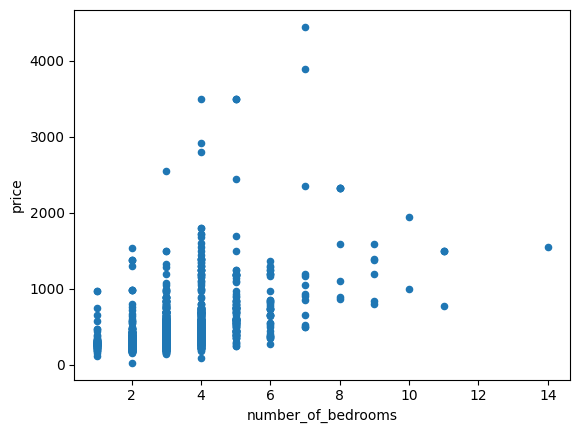

In [74]:
df_subset = df.query('property_size < 20000')
df_subset.plot(kind = 'scatter', x = 'number_of_bedrooms', y = 'price')


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2772 entries, 51889 to 9517
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   property_id                 2772 non-null   int64         
 1   date_obtained               2772 non-null   datetime64[ns]
 2   price                       2772 non-null   float64       
 3   livable_area                2772 non-null   float64       
 4   heating_type                2772 non-null   object        
 5   has_photovoltaic_panels     2772 non-null   object        
 6   has_double_glazing          2772 non-null   object        
 7   number_of_bathrooms         2772 non-null   float64       
 8   number_of_bedrooms          2772 non-null   float64       
 9   number_of_toilets           2772 non-null   float64       
 10  has_living_room             2772 non-null   bool          
 11  has_attic                   2772 non-null   object       

<Axes: >

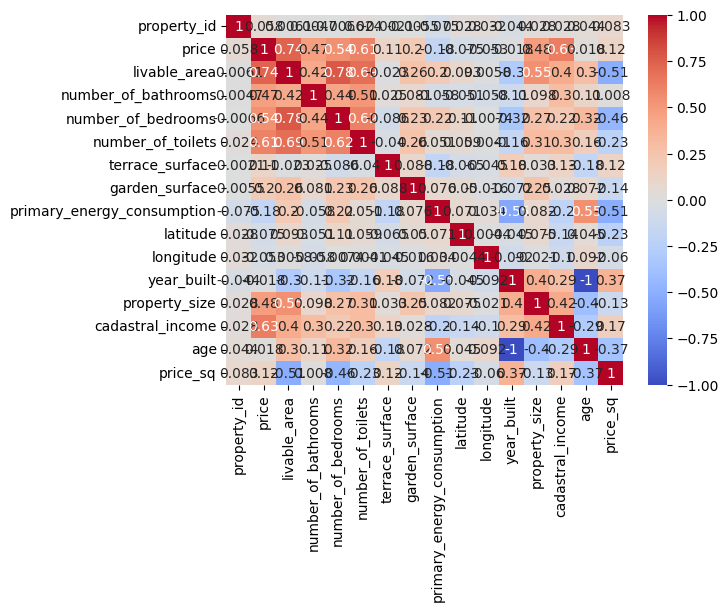

In [76]:
numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
sns.heatmap(df[numeric_cols].corr('spearman'), annot=True, cmap='coolwarm')


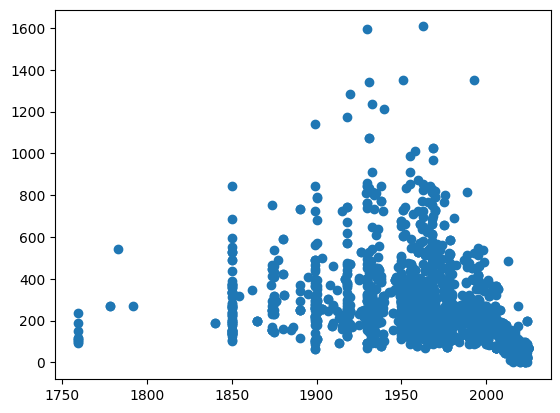

In [77]:
plt.scatter(df.year_built, df.primary_energy_consumption)

In [78]:
df[numeric_cols]

,property_id,price,livable_area,number_of_bathrooms,number_of_bedrooms,number_of_toilets,terrace_surface,garden_surface,primary_energy_consumption,latitude,longitude,year_built,property_size,cadastral_income,age,price_sq
51889,11347297,320.000,74.0,1.0,1.0,1.0,0.0,0.0,122.0,51.030354,3.712580,1960.0,NaN,919.0,64.0,4.324324
38000,11111488,289.000,100.0,1.0,3.0,1.0,0.0,0.0,181.0,51.060666,3.697576,1900.0,46.0,262.0,124.0,2.890000
7212,11341004,289.000,121.0,1.0,3.0,1.0,0.0,0.0,319.0,51.063490,3.704824,NaN,60.0,468.0,NaN,2.388430
19329,11286359,278.000,125.0,1.0,2.0,2.0,0.0,261.0,319.0,51.093579,3.759201,1933.0,261.0,257.0,91.0,2.224000
5800,11351745,384.000,150.0,1.0,3.0,2.0,0.0,0.0,139.0,51.044219,3.757021,1935.0,NaN,1010.0,89.0,2.560000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10710,11470933,289.000,73.0,1.0,2.0,1.0,0.0,0.0,117.0,51.057714,3.742553,1955.0,NaN,833.0,69.0,3.958904
4229,20001469,968.175,467.0,1.0,4.0,3.0,0.0,0.0,188.0,50.976293,3.728646,NaN,432.0,2154.0,NaN,2.073180
1973,11401010,499.000,155.0,1.0,2.0,1.0,8.0,0.0,271.0,51.040664,3.736066,1967.0,NaN,1189.0,57.0,3.219355
41175,11490196,365.000,88.0,1.0,2.0,1.0,0.0,0.0,95.0,51.066193,3.722825,2015.0,NaN,975.0,9.0,4.147727


In [79]:
df.query('property_id == 11400120')

,property_id,date_obtained,price,livable_area,heating_type,has_photovoltaic_panels,has_double_glazing,number_of_bathrooms,number_of_bedrooms,number_of_toilets,...,latitude,longitude,year_built,building_condition,property_size,flood_zone_type,cadastral_income,age,price_sq,property_type_HOUSE
49009,11400120,2024-05-24,440.0,249.0,Unknown,False,False,1.0,3.0,2.0,...,51.053977,3.618189,1999.0,Unknown,800.0,Unknown,1224.0,25.0,1.767068,True


In [80]:
df.property_id.nunique()

2772